In [ ]:
!pip install --upgrade transformers


Please upload the BBC News Summary dataset (.zip file).


Saving BBC News Summary.zip to BBC News Summary (3).zip
Unzipping the dataset BBC News Summary (3).zip...
Dataset extracted to ./BBC News Summary
Exploring extracted directory structure:
Found 'News Articles' directory at ./BBC News Summary/BBC News Summary
Found 'Summaries' directory at ./BBC News Summary/BBC News Summary
Found 'News Articles' directory at ./BBC News Summary/BBC News Summary/BBC News Summary
Found 'Summaries' directory at ./BBC News Summary/BBC News Summary/BBC News Summary
Checking for GPU availability...
Using device: cuda
Articles path: ./BBC News Summary/BBC News Summary/BBC News Summary/News Articles
Summaries path: ./BBC News Summary/BBC News Summary/BBC News Summary/Summaries

=============== Data Exploration ===============
Categories in the dataset: ['politics', 'tech', 'entertainment', 'sport', 'business']

Number of articles per category:
politics: 417 articles
tech: 401 articles
entertainment: 386 articles
sport: 511 articles
business: 510 articles


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


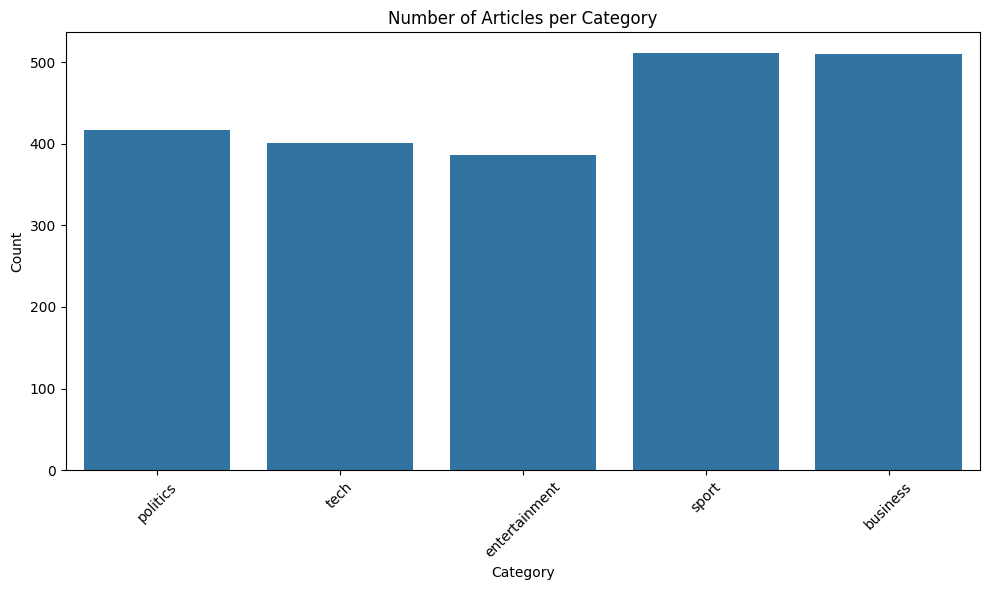


Total paired articles and summaries: 2225

Sample articles and summaries:

Category: politics
Article length: 3568 characters, 629 words
Summary length: 1864 characters, 322 words
Compression ratio: 0.51

Article (first 300 characters):
Labour MPs' fears over squabbling

If there is one thing certain to stiffen the spines of Labour MPs it is the prospect of losing their seats at a general election.

And it was largely that fear that led to Tony Blair and Gordon Brown being read the riot act during a meeting of the parliamentary Lab...

Summary:
The views expressed by both backbenchers and Labour peers over the claimed squabbling between the two men starkly demonstrated the widely-held view within the Labour party that the two most powerful figures in the government are jeopardising the next election.The dressing down appears to have done the trick, with Mr Brown joining his alleged rival Alan Milburn - who the prime minister put in charge of election planning in Mr Brown's stead - and

  0%|          | 0/2225 [00:00<?, ?it/s]

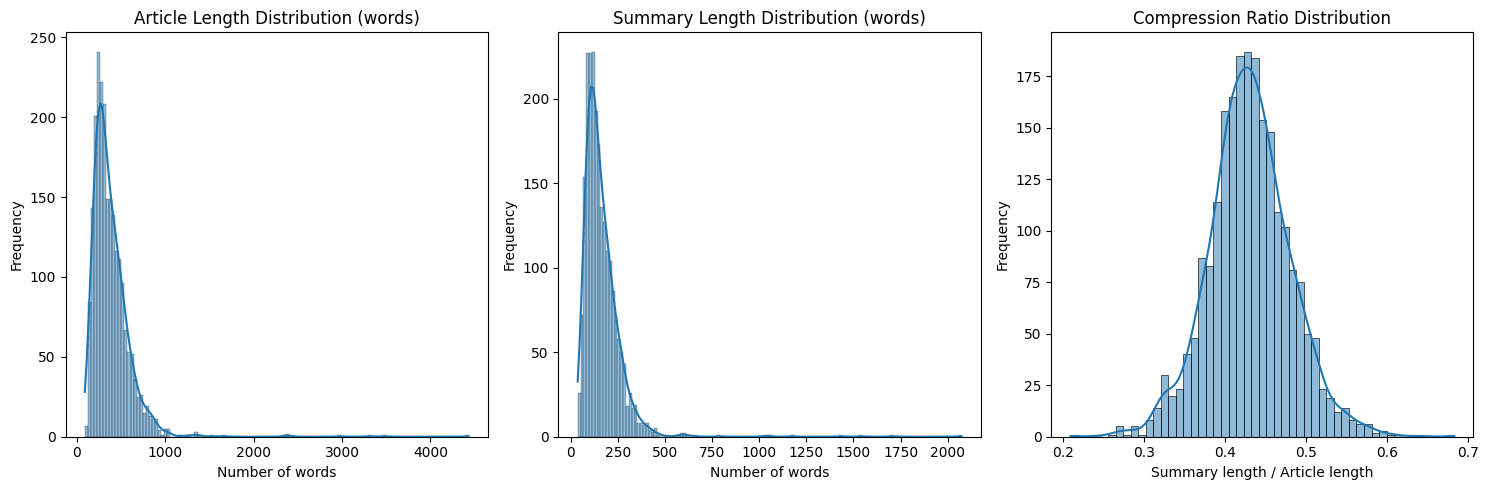


Article length statistics:
Mean: 384.04 words
Median: 332.00 words
Min: 89 words
Max: 4432 words

Summary length statistics:
Mean: 165.17 words
Median: 142.00 words
Min: 38 words
Max: 2073 words

Compression ratio statistics:
Mean: 0.4302
Median: 0.4292

=============== Data Preprocessing ===============


Reading articles:   0%|          | 0/2225 [00:00<?, ?it/s]

Reading summaries:   0%|          | 0/2225 [00:00<?, ?it/s]

Preprocessing articles:   0%|          | 0/2225 [00:00<?, ?it/s]

Preprocessing summaries:   0%|          | 0/2225 [00:00<?, ?it/s]


Data split sizes:
Training set: 1557 samples
Validation set: 334 samples
Test set: 334 samples

=============== Model Training ===============
Initializing tokenizer and model: facebook/bart-base


<ipython-input-7-486dcf463889>:423: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(



Training the model...


Step,Training Loss,Validation Loss
100,0.597300,0.344031
200,0.356300,0.279246
300,0.320900,0.247153
400,0.288900,0.233437
500,0.311500,0.224976
600,0.223700,0.212686
700,0.248400,0.204765
800,0.213700,0.197157
900,0.188100,0.198165
1000,0.191800,0.185584


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3339: UserWarning: Moving the following attributes in the config to the generation config: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(
There were missing keys in the checkpoint model loaded: ['model.encoder.embed_tokens.weight', 'model.decoder.embed_tokens.weight', 'lm_head.weight'].



Saving model to ./abstractive_summarizer_model

=============== Model Evaluation ===============

Evaluating model on test set...


Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]


Example 1:
Article: Asia quake increases poverty risk Nearly two million people across Asia could be thrown into poverty because of the Indian Ocean tsunami, the Asian Development Bank (ADB) has said. In its first overview of the disaster, the ADB said the impact on economic growth would be slight because major cities ...
Reference: Nearly two million people across Asia could be thrown into poverty because of the Indian Ocean tsunami, the Asian Development Bank (ADB) has said.The ADB fears that 1 million Indonesians could join them, while in India just over half a million people - 645,000 - are at risk of falling into poverty.Sri Lanka and the Maldives are the two countries the ADB fears are most at risk of suffering lasting economic damage from the tsunami.But the economies of the affected countries except Sri Lanka and the Maldives should emerge with minimal damage," the ADB report said.A quarter of a million Sri Lankans and 23,500 people in the Maldives are also facing poverty.Thai

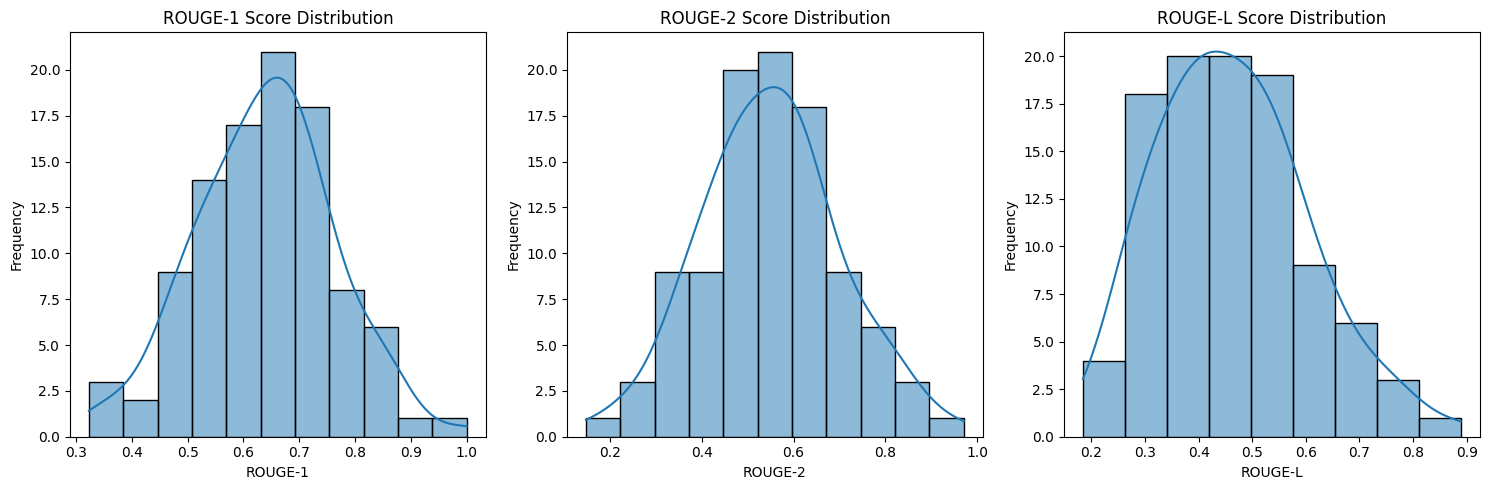


=============== Interactive Demo ===============

Sample article category: sport

Sample article text:
Dawson wins England squad recall Wasps scrum-half Matt Dawson has been recalled to England's training squad ahead of the RBS Six Nations and been reinstated in the Elite Player Squad. Coach Andy Robinson dropped Dawson for the autumn Tests after he missed training to film 'A Question of Sport.' "I always said I would consider bringing Matt back if I felt he was playing well," Robinson said. "He merits his return on current form." Newcastle's 18-year-old centre Mathew Tait is also in the training squad. "It's obviously an honour to be asked to train with England," said Tait, who has burst into contention recently. "I look forward to going down and doing the sessions, but the most important thing at the moment is Sunday's game against Newport, so I'm not looking any further than that." Robinson has invited 42 players to attend a three-day session in Leeds next week, in which his squad 

In [ ]:
from google.colab import files
import zipfile
import os
os.environ["WANDB_DISABLED"] = "true"
print("Please upload the BBC News Summary dataset (.zip file).")
uploaded = files.upload()

zip_file_name = next(iter(uploaded))
extracted_dir = './BBC News Summary'

if zip_file_name.endswith('.zip'):
    print(f"Unzipping the dataset {zip_file_name}...")

    if not os.path.exists(extracted_dir):
        os.makedirs(extracted_dir)

    with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
        zip_ref.extractall(extracted_dir)

    print(f"Dataset extracted to {extracted_dir}")

    print("Exploring extracted directory structure:")
    for root, dirs, files in os.walk(extracted_dir):
        if "News Articles" in dirs:
            print(f"Found 'News Articles' directory at {root}")
        if "Summaries" in dirs:
            print(f"Found 'Summaries' directory at {root}")
else:
    print("Uploaded file is not a .zip file. Please upload a valid .zip file.")

!pip install transformers datasets rouge-score nltk pandas matplotlib seaborn pytorch-lightning

import os
import glob
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from transformers import (
    BartTokenizer,
    BartForConditionalGeneration,
    Seq2SeqTrainer,
    Seq2SeqTrainingArguments
)
from rouge_score import rouge_scorer
from tqdm.notebook import tqdm

nltk.download('punkt')
nltk.download('stopwords')

# Set random seed for reproducibility
def set_seed(seed=42):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

set_seed()

print("Checking for GPU availability...")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

def find_dataset_paths(base_dir='./BBC News Summary'):
    articles_path = None
    summaries_path = None

    for root, dirs, files in os.walk(base_dir):
        if "News Articles" in dirs:
            articles_path = os.path.join(root, "News Articles")
        if "Summaries" in dirs:
            summaries_path = os.path.join(root, "Summaries")

    return articles_path, summaries_path

articles_path, summaries_path = find_dataset_paths()
print(f"Articles path: {articles_path}")
print(f"Summaries path: {summaries_path}")
def read_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
        return f.read().strip()

print("\n=============== Data Exploration ===============")

categories = []
if articles_path:
    categories = [dir for dir in os.listdir(articles_path) if os.path.isdir(os.path.join(articles_path, dir))]
    print(f"Categories in the dataset: {categories}")
else:
    print("Could not find the News Articles directory. Using Hugging Face dataset instead.")
    from datasets import load_dataset
    print("Loading BBC News dataset from Hugging Face...")
    dataset = load_dataset("SetFit/bbc-news")
    categories = list(set(dataset["train"]["label_text"]))
    print(f"Categories in the dataset: {categories}")

if articles_path and summaries_path and categories:
    category_counts = {}
    for category in categories:
        category_path = os.path.join(articles_path, category)
        category_counts[category] = len(glob.glob(os.path.join(category_path, "*.txt")))

    print("\nNumber of articles per category:")
    for category, count in category_counts.items():
        print(f"{category}: {count} articles")

    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()))
    plt.title('Number of Articles per Category')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    article_files = []
    summary_files = []
    categories_list = []

    for category in categories:
        category_articles_path = os.path.join(articles_path, category)
        category_article_files = glob.glob(os.path.join(category_articles_path, "*.txt"))

        for article_file in category_article_files:
            filename = os.path.basename(article_file)
            summary_file = os.path.join(summaries_path, category, filename)

            if os.path.exists(summary_file):
                article_files.append(article_file)
                summary_files.append(summary_file)
                categories_list.append(category)

    print(f"\nTotal paired articles and summaries: {len(article_files)}")

    num_samples = 3
    sample_indices = np.random.choice(len(article_files), num_samples, replace=False)

    print("\nSample articles and summaries:")
    for idx in sample_indices:
        article = read_text_file(article_files[idx])
        summary = read_text_file(summary_files[idx])
        category = categories_list[idx]

        print(f"\nCategory: {category}")
        print(f"Article length: {len(article)} characters, {len(article.split())} words")
        print(f"Summary length: {len(summary)} characters, {len(summary.split())} words")
        print(f"Compression ratio: {len(summary.split()) / len(article.split()):.2f}")

        print("\nArticle (first 300 characters):")
        print(article[:300] + "...")

        print("\nSummary:")
        print(summary)

        print("\n" + "="*50)

    article_lengths = []
    summary_lengths = []
    compression_ratios = []

    print("\nAnalyzing text lengths...")
    for article_file, summary_file in tqdm(zip(article_files, summary_files), total=len(article_files)):
        article = read_text_file(article_file)
        summary = read_text_file(summary_file)

        article_length = len(article.split())
        summary_length = len(summary.split())

        article_lengths.append(article_length)
        summary_lengths.append(summary_length)

        if article_length > 0:
            compression_ratios.append(summary_length / article_length)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    sns.histplot(article_lengths, kde=True)
    plt.title('Article Length Distribution (words)')
    plt.xlabel('Number of words')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 2)
    sns.histplot(summary_lengths, kde=True)
    plt.title('Summary Length Distribution (words)')
    plt.xlabel('Number of words')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 3)
    sns.histplot(compression_ratios, kde=True)
    plt.title('Compression Ratio Distribution')
    plt.xlabel('Summary length / Article length')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    print("\nArticle length statistics:")
    print(f"Mean: {np.mean(article_lengths):.2f} words")
    print(f"Median: {np.median(article_lengths):.2f} words")
    print(f"Min: {np.min(article_lengths)} words")
    print(f"Max: {np.max(article_lengths)} words")

    print("\nSummary length statistics:")
    print(f"Mean: {np.mean(summary_lengths):.2f} words")
    print(f"Median: {np.median(summary_lengths):.2f} words")
    print(f"Min: {np.min(summary_lengths)} words")
    print(f"Max: {np.max(summary_lengths)} words")

    print("\nCompression ratio statistics:")
    print(f"Mean: {np.mean(compression_ratios):.4f}")
    print(f"Median: {np.median(compression_ratios):.4f}")

    print("\n=============== Data Preprocessing ===============")

    articles = [read_text_file(file) for file in tqdm(article_files, desc="Reading articles")]
    summaries = [read_text_file(file) for file in tqdm(summary_files, desc="Reading summaries")]

else:
    from datasets import load_dataset
    from nltk.tokenize import sent_tokenize

    print("\nUsing Hugging Face BBC News dataset...")
    dataset = load_dataset("SetFit/bbc-news")

    articles = dataset["train"]["text"]
    categories_list = dataset["train"]["label_text"]

    def extract_summary(text, num_sentences=3):
        sentences = sent_tokenize(text)
        return " ".join(sentences[:min(num_sentences, len(sentences))])

    summaries = [extract_summary(article) for article in articles]

    article_lengths = [len(article.split()) for article in articles]
    summary_lengths = [len(summary.split()) for summary in summaries]
    compression_ratios = [len(summary.split()) / len(article.split()) if len(article.split()) > 0 else 0
                          for article, summary in zip(articles, summaries)]

    print(f"\nTotal articles: {len(articles)}")

    num_samples = 3
    sample_indices = np.random.choice(len(articles), num_samples, replace=False)

    print("\nSample articles and summaries:")
    for idx in sample_indices:
        article = articles[idx]
        summary = summaries[idx]
        category = categories_list[idx]

        print(f"\nCategory: {category}")
        print(f"Article length: {len(article)} characters, {len(article.split())} words")
        print(f"Summary length: {len(summary)} characters, {len(summary.split())} words")
        print(f"Compression ratio: {len(summary.split()) / len(article.split()):.2f}")

        print("\nArticle (first 300 characters):")
        print(article[:300] + "...")

        print("\nSummary:")
        print(summary)

        print("\n" + "="*50)

def preprocess_text(text):
    text = text.replace('\n', ' ')
    text = ' '.join(text.split())
    return text

preprocessed_articles = [preprocess_text(article) for article in tqdm(articles, desc="Preprocessing articles")]
preprocessed_summaries = [preprocess_text(summary) for summary in tqdm(summaries, desc="Preprocessing summaries")]

train_articles, test_articles, train_summaries, test_summaries, train_categories, test_categories = train_test_split(
    preprocessed_articles, preprocessed_summaries, categories_list, test_size=0.15, random_state=42, stratify=categories_list
)

train_articles, val_articles, train_summaries, val_summaries, train_categories, val_categories = train_test_split(
    train_articles, train_summaries, train_categories, test_size=0.15/0.85, random_state=42, stratify=train_categories
)

print(f"\nData split sizes:")
print(f"Training set: {len(train_articles)} samples")
print(f"Validation set: {len(val_articles)} samples")
print(f"Test set: {len(test_articles)} samples")

class NewsSummaryDataset(Dataset):
    def __init__(self, articles, summaries, tokenizer, max_article_length=1024, max_summary_length=256):
        self.tokenizer = tokenizer
        self.articles = articles
        self.summaries = summaries
        self.max_article_length = max_article_length
        self.max_summary_length = max_summary_length

    def __len__(self):
        return len(self.articles)

    def __getitem__(self, idx):
        article = self.articles[idx]
        summary = self.summaries[idx]

        article_encodings = self.tokenizer(
            article,
            truncation=True,
            padding='max_length',
            max_length=self.max_article_length,
            return_tensors="pt"
        )

        summary_encodings = self.tokenizer(
            summary,
            truncation=True,
            padding='max_length',
            max_length=self.max_summary_length,
            return_tensors="pt"
        )

        input_ids = article_encodings.input_ids.squeeze()
        attention_mask = article_encodings.attention_mask.squeeze()

        labels = summary_encodings.input_ids.squeeze().clone()
        labels[labels == self.tokenizer.pad_token_id] = -100

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': labels
        }

print("\n=============== Model Training ===============")

model_name = "facebook/bart-base"
print(f"Initializing tokenizer and model: {model_name}")

tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

train_dataset = NewsSummaryDataset(train_articles, train_summaries, tokenizer)
val_dataset = NewsSummaryDataset(val_articles, val_summaries, tokenizer)
test_dataset = NewsSummaryDataset(test_articles, test_summaries, tokenizer)

training_args = Seq2SeqTrainingArguments(
    output_dir="./results",
    eval_strategy="steps",
    eval_steps=100,
    save_steps=500,
    save_total_limit=2,
    num_train_epochs=3,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=50,
    predict_with_generate=True,
    learning_rate=5e-5,
    load_best_model_at_end=True,
    report_to=["none"],
    disable_tqdm=False,
)

generation_params = {
    "max_length": 150,
    "min_length": 40,
    "length_penalty": 2.0,
    "num_beams": 4,
    "early_stopping": True
}

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
)

print("\nTraining the model...")
trainer.train()

model_save_path = "./abstractive_summarizer_model"
tokenizer_save_path = "./abstractive_summarizer_tokenizer"

print(f"\nSaving model to {model_save_path}")
model.save_pretrained(model_save_path)
tokenizer.save_pretrained(tokenizer_save_path)

print("\n=============== Model Evaluation ===============")

rouge_scorer_instance = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

def evaluate_summaries(model, test_articles, test_summaries, num_samples=100):
    model.eval()
    model.to(device)

    rouge1_scores = []
    rouge2_scores = []
    rougeL_scores = []

    sample_size = min(num_samples, len(test_articles))
    sample_indices = np.random.choice(len(test_articles), sample_size, replace=False)

    for i in tqdm(sample_indices, desc="Evaluating"):
        article = test_articles[i]
        reference_summary = test_summaries[i]

        inputs = tokenizer(article, return_tensors="pt", max_length=1024, truncation=True).to(device)
        summary_ids = model.generate(
            inputs.input_ids,
            max_length=150,
            min_length=40,
            length_penalty=2.0,
            num_beams=4,
            early_stopping=True
        )

        generated_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

        scores = rouge_scorer_instance.score(reference_summary, generated_summary)

        rouge1_scores.append(scores['rouge1'].fmeasure)
        rouge2_scores.append(scores['rouge2'].fmeasure)
        rougeL_scores.append(scores['rougeL'].fmeasure)

        if len(rouge1_scores) <= 3:
            print(f"\nExample {len(rouge1_scores)}:")
            print(f"Article: {article[:300]}...")
            print(f"Reference: {reference_summary}")
            print(f"Generated: {generated_summary}")
            print(f"ROUGE-1: {scores['rouge1'].fmeasure:.4f}")
            print(f"ROUGE-2: {scores['rouge2'].fmeasure:.4f}")
            print(f"ROUGE-L: {scores['rougeL'].fmeasure:.4f}")
            print("="*50)

    avg_rouge1 = np.mean(rouge1_scores)
    avg_rouge2 = np.mean(rouge2_scores)
    avg_rougeL = np.mean(rougeL_scores)

    return {
        'rouge1': avg_rouge1,
        'rouge2': avg_rouge2,
        'rougeL': avg_rougeL,
        'rouge1_all': rouge1_scores,
        'rouge2_all': rouge2_scores,
        'rougeL_all': rougeL_scores
    }

print("\nEvaluating model on test set...")
evaluation_results = evaluate_summaries(model, test_articles, test_summaries)

print("\nAverage ROUGE scores on test set:")
print(f"ROUGE-1: {evaluation_results['rouge1']:.4f}")
print(f"ROUGE-2: {evaluation_results['rouge2']:.4f}")
print(f"ROUGE-L: {evaluation_results['rougeL']:.4f}")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(evaluation_results['rouge1_all'], kde=True)
plt.title('ROUGE-1 Score Distribution')
plt.xlabel('ROUGE-1')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(evaluation_results['rouge2_all'], kde=True)
plt.title('ROUGE-2 Score Distribution')
plt.xlabel('ROUGE-2')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(evaluation_results['rougeL_all'], kde=True)
plt.title('ROUGE-L Score Distribution')
plt.xlabel('ROUGE-L')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("\n=============== Interactive Demo ===============")

def generate_summary(article_text):
    article_text = preprocess_text(article_text)

    inputs = tokenizer(article_text, return_tensors="pt", max_length=1024, truncation=True).to(device)

    summary_ids = model.generate(
        inputs.input_ids,
        max_length=150,
        min_length=40,
        length_penalty=2.0,
        num_beams=4,
        early_stopping=True
    )

    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

sample_idx = np.random.randint(0, len(test_articles))
sample_article = test_articles[sample_idx]
sample_category = test_categories[sample_idx]

print(f"\nSample article category: {sample_category}")
print("\nSample article text:")
print(sample_article)

print("\nGenerating summary...")
generated_summary = generate_summary(sample_article)

print("\nGenerated summary:")
print(generated_summary)

print("\nReference summary:")
print(test_summaries[sample_idx])

print("\nEnter your own article text (press Enter twice when done):")
print("(Enter a blank line to finish)")
user_article_lines = []
while True:
    line = input()
    if line.strip() == "":
        break
    user_article_lines.append(line)

user_article = "\n".join(user_article_lines)

if user_article.strip():
    print("\nGenerating summary for your article...")
    user_summary = generate_summary(user_article)
    print("\nGenerated summary:")
    print(user_summary)

print("\n=============== End of Notebook ===============")

In [ ]:
def interactive_summarization_loop():
    while True:
        print("\nEnter your article text (press Enter twice when done):")
        print("(Enter a blank line to finish or type 'quit' to exit)")
        user_article_lines = []
        while True:
            line = input()
            if line.strip() == "" or line.lower() == "quit":
                break
            user_article_lines.append(line)

        user_article = "\n".join(user_article_lines)

        if user_article.strip().lower() == "quit":
            print("Exiting summarization tool.")
            break

        if user_article.strip():
            print("\nGenerating summary for your article...")
            user_summary = generate_summary(user_article)
            print("\nGenerated summary:")
            print(user_summary)
        else:
            print("Empty input. Please enter text to summarize or 'quit' to exit.")

        print("\nWould you like to summarize another article? (yes/no)")
        continue_response = input().lower().strip()
        if continue_response != "yes" and continue_response != "y":
            print("Exiting summarization tool.")
            break

interactive_summarization_loop()

print("\n=============== End of Notebook ===============")


Enter your article text (press Enter twice when done):
(Enter a blank line to finish or type 'quit' to exit)

Generating summary for your article...

Generated summary:
In 1879 two new classes, an Agricultural class and a Forest class, were added to the college, and the name of the college was changed from "The Poona Civil Engineering College " to "The College of Science".The institution was initially affiliated to the University of Bombay (now Mumbai) for a degree of Licentiate in Civil Engineering known as LCE in 1858.[6][8][12][13][14]The certificate course was converted into a civil engineering degree course in 1908 and degree programs in mechanical engineering and electrical engineering were started in 1912 and 1932, respectively.In a bid to boost research in engineering and postdoctoral research, the College of Engineering Pune (CoEP) was granted an additional campus

Would you like to summarize another article? (yes/no)
